In [1]:
import pandas as pd
from collections import *
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import RandomizedPCA
from pylab import *

%matplotlib inline

## Prep student newspapers

In [2]:
df_student = pd.read_csv("../../data/meta/Student-Newspapers.csv")
print df_student.shape

(646, 28)


In [3]:
df_rel_student = df_student[['Object Unique ID', 'Begin date', 'Date:creation', 'End date', 'Title']]
df_rel_student.head(20)

,Object Unique ID,Begin date,Date:creation,End date,Title
0,http://library.ucsd.edu/ark:/20775/bb8806609v,1977-10-11,"October 11-25, 1977",1977-10-25,The New Indicator
1,http://library.ucsd.edu/ark:/20775/bb2970379j,1978-02-07,"February 7-20, 1978",1978-02-20,The New Indicator
2,http://library.ucsd.edu/ark:/20775/bb60420770,1969-11-12,"November 12, 1969",1969-11-12,The Indicator
3,http://library.ucsd.edu/ark:/20775/bb6519900h,1985-09-25,"September 25, 1985",1985-09-25,The University Report
4,http://library.ucsd.edu/ark:/20775/bb65198992,1986-02-01,February 1986,1986-02-28,California Review
5,http://library.ucsd.edu/ark:/20775/bb4403839b,1983-12-01,Winter 1983,1983-02-28,Revellations
6,http://library.ucsd.edu/ark:/20775/bb8431179p,1982-04-27,"April 27-May 10, 1982",1982-05-10,The New Indicator
7,http://library.ucsd.edu/ark:/20775/bb4813399r,1991-10-30,"October 30, 1991",1991-10-30,Revellations
8,http://library.ucsd.edu/ark:/20775/bb6963590v,1988-02-08,"February 8-22, 1988",1988-02-22,The New Indicator
9,http://library.ucsd.edu/ark:/20775/bb97281184,1977-11-01,November 1977,1977-11-30,Revellations


In [4]:
student_filenames = ["../../data/Fulltext/Student Newspapers/" + f.split("20775/")[-1] + '-1.pdf.txt' for f in df_student['Object Unique ID'].tolist()]
print 'We have', len(student_filenames), 'files'
student_filenames[:4]

In [6]:
student_docs = []
for filename in student_filenames:
    txt = open(filename)
    student_docs.append(txt.read())

## Prep Guardian

In [9]:
df_g = pd.read_csv("../../data/meta/UCSD-Guardian.csv")
print df_g.shape

(2915, 46)


In [10]:
df_rel_g = df_g[['Object Unique ID', 'Begin date', 'Date:creation', 'End date', 'Title']]
df_rel_g.head(20)

,Object Unique ID,Begin date,Date:creation,End date,Title
0,http://library.ucsd.edu/ark:/20775/bb4813423q,1994-02-10,"February 10, 1994",1994-02-10,UCSD Guardian
1,http://library.ucsd.edu/ark:/20775/bb8943155k,1979-05-07,"May 7, 1979",1979-05-07,Guardian
2,http://library.ucsd.edu/ark:/20775/bb47792902,1987-05-21,"May 21, 1987",1987-05-21,UCSD Guardian
3,http://library.ucsd.edu/ark:/20775/bb75779516,1987-05-07,"May 7, 1987",1987-05-07,UCSD Guardian
4,http://library.ucsd.edu/ark:/20775/bb0479396b,2014-01-16,"January 16, 2014",2014-01-16,UCSD Guardian
5,http://library.ucsd.edu/ark:/20775/bb23906782,2014-03-10,"March 10, 2014",2014-03-10,UCSD Guardian
6,http://library.ucsd.edu/ark:/20775/bb86701140,1977-03-16,"March 16, 1977",1977-03-16,Triton Times
7,http://library.ucsd.edu/ark:/20775/bb5837320f,1981-01-05,"January 5, 1981",1981-01-05,The Guardian
8,http://library.ucsd.edu/ark:/20775/bb2014764j,1990-10-15,"October 15, 1990",1990-10-15,UCSD Guardian
9,http://library.ucsd.edu/ark:/20775/bb32093141,2000-10-26,"October 26, 2000",2000-10-26,UCSD Guardian


In [14]:
g_filenames = ["../../data/Fulltext/UCSD Guardian/" + f.split("20775/")[-1] + '-1.pdf.txt' for f in df_g['Object Unique ID'].tolist()]
print 'We have', len(g_filenames), 'files'
g_filenames[:4]

We have 2915 files


['../../data/Fulltext/UCSD Guardian/bb4813423q-1.pdf.txt',
 '../../data/Fulltext/UCSD Guardian/bb8943155k-1.pdf.txt',
 '../../data/Fulltext/UCSD Guardian/bb47792902-1.pdf.txt',
 '../../data/Fulltext/UCSD Guardian/bb75779516-1.pdf.txt']

In [15]:
g_docs = []
for filename in g_filenames:
    txt = open(filename)
    g_docs.append(txt.read())

## Merge student and guardian

In [23]:
df_rel = df_rel_student.append(df_rel_g)
print df_rel.shape

(3561, 5)


In [24]:
df_rel.head()

,Object Unique ID,Begin date,Date:creation,End date,Title
0,http://library.ucsd.edu/ark:/20775/bb8806609v,1977-10-11,"October 11-25, 1977",1977-10-25,The New Indicator
1,http://library.ucsd.edu/ark:/20775/bb2970379j,1978-02-07,"February 7-20, 1978",1978-02-20,The New Indicator
2,http://library.ucsd.edu/ark:/20775/bb60420770,1969-11-12,"November 12, 1969",1969-11-12,The Indicator
3,http://library.ucsd.edu/ark:/20775/bb6519900h,1985-09-25,"September 25, 1985",1985-09-25,The University Report
4,http://library.ucsd.edu/ark:/20775/bb65198992,1986-02-01,February 1986,1986-02-28,California Review


In [25]:
df_rel["doc_source"] = "UCSD Guardian"

In [29]:
df_rel.doc_source[0:df_student.shape[0]] = "Student Newspapers"

In [35]:
df_rel.head()

,Object Unique ID,Begin date,Date:creation,End date,Title,doc_source
0,http://library.ucsd.edu/ark:/20775/bb8806609v,1977-10-11,"October 11-25, 1977",1977-10-25,The New Indicator,Student Newspapers
1,http://library.ucsd.edu/ark:/20775/bb2970379j,1978-02-07,"February 7-20, 1978",1978-02-20,The New Indicator,Student Newspapers
2,http://library.ucsd.edu/ark:/20775/bb60420770,1969-11-12,"November 12, 1969",1969-11-12,The Indicator,Student Newspapers
3,http://library.ucsd.edu/ark:/20775/bb6519900h,1985-09-25,"September 25, 1985",1985-09-25,The University Report,Student Newspapers
4,http://library.ucsd.edu/ark:/20775/bb65198992,1986-02-01,February 1986,1986-02-28,California Review,Student Newspapers


In [30]:
docs = student_docs + g_docs

## Extract features

In [46]:
count_vect = CountVectorizer(min_df = 20, analyzer = "word", stop_words="english", binary=True)
X_train_counts = count_vect.fit_transform(docs)
print X_train_counts.shape

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print X_train_tf.shape

(3561, 71359)
(3561, 71359)


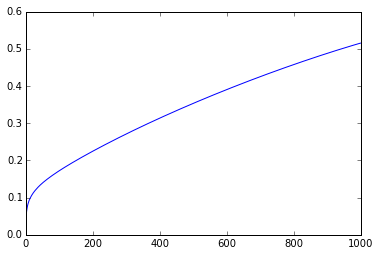

In [52]:
pca = RandomizedPCA(n_components=1000)
#docs_pca = pca.fit_transform(X_train_tf.todense())
docs_pca = pca.fit_transform(X_train_counts.todense())

plot(cumsum(pca.explained_variance_ratio_))

In [53]:
sum(pca.explained_variance_ratio_)

0.51523848063372868

In [54]:
docs_pca_df = pd.DataFrame(docs_pca)
docs_pca_df.rename(columns=lambda x: "pc" + str(x), inplace=True)
docs_pca_df.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc990,pc991,pc992,pc993,pc994,pc995,pc996,pc997,pc998,pc999
0,-18.170567,1.218896,1.449812,-1.400720,3.984571,1.278815,-0.446867,1.700490,-0.463679,0.250460,...,-0.257094,-0.341601,-0.075788,-0.615886,0.145288,-0.465320,-0.403258,0.623111,0.596808,-0.339282
1,-18.652544,0.216901,1.548563,-1.697256,3.935080,0.731966,-0.354829,1.636136,-0.155649,0.952500,...,0.416738,-0.336344,-0.571638,0.164800,-0.118745,0.162468,-0.525446,-0.153972,0.416382,0.302817
2,-9.399997,2.587698,6.078531,-3.240778,3.000749,-1.987608,1.238427,-2.126464,1.805269,-3.544710,...,0.044808,0.239628,-0.398163,-0.126636,-1.974407,-0.727242,0.581414,0.543667,0.386008,0.347049
3,0.831470,0.011931,2.979708,2.622057,-2.640836,0.885776,-0.073573,0.774736,-1.216625,-2.552224,...,-0.455927,0.288036,-0.380752,-0.652872,-0.244334,0.780284,1.839572,1.416968,1.515336,0.134128
4,-6.641128,6.896709,16.696561,-3.855638,4.836227,3.278189,2.214443,2.204848,-1.129062,-0.413436,...,-0.828142,0.773544,1.888637,1.524900,-0.265820,-0.917409,-1.236494,1.807501,0.223083,-0.265583


In [55]:
res = df_rel.join(docs_pca_df)
res.head()

,Object Unique ID,Begin date,Date:creation,End date,Title,doc_source,pc0,pc1,pc2,pc3,...,pc990,pc991,pc992,pc993,pc994,pc995,pc996,pc997,pc998,pc999
0,http://library.ucsd.edu/ark:/20775/bb8806609v,1977-10-11,"October 11-25, 1977",1977-10-25,The New Indicator,Student Newspapers,-18.170567,1.218896,1.449812,-1.400720,...,-0.257094,-0.341601,-0.075788,-0.615886,0.145288,-0.465320,-0.403258,0.623111,0.596808,-0.339282
0,http://library.ucsd.edu/ark:/20775/bb4813423q,1994-02-10,"February 10, 1994",1994-02-10,UCSD Guardian,UCSD Guardian,-18.170567,1.218896,1.449812,-1.400720,...,-0.257094,-0.341601,-0.075788,-0.615886,0.145288,-0.465320,-0.403258,0.623111,0.596808,-0.339282
1,http://library.ucsd.edu/ark:/20775/bb2970379j,1978-02-07,"February 7-20, 1978",1978-02-20,The New Indicator,Student Newspapers,-18.652544,0.216901,1.548563,-1.697256,...,0.416738,-0.336344,-0.571638,0.164800,-0.118745,0.162468,-0.525446,-0.153972,0.416382,0.302817
1,http://library.ucsd.edu/ark:/20775/bb8943155k,1979-05-07,"May 7, 1979",1979-05-07,Guardian,UCSD Guardian,-18.652544,0.216901,1.548563,-1.697256,...,0.416738,-0.336344,-0.571638,0.164800,-0.118745,0.162468,-0.525446,-0.153972,0.416382,0.302817
2,http://library.ucsd.edu/ark:/20775/bb60420770,1969-11-12,"November 12, 1969",1969-11-12,The Indicator,Student Newspapers,-9.399997,2.587698,6.078531,-3.240778,...,0.044808,0.239628,-0.398163,-0.126636,-1.974407,-0.727242,0.581414,0.543667,0.386008,0.347049


In [56]:
res.to_csv("../../results/guardian_and_student_tfidf.csv")